# Sentiment Analysis

# By Mahesh S Valanju

### 1) Import Libraries

In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#nltk.downloader.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

### 2) Authentication

In [2]:
consumerKey = 'ehe4OytjEN4UVePOumtIXC3if'
consumerSecret = 'XmRUfI0y3Elv2lZRkCqZurQ02ELqw89TjEWbAi0qtyAvhjEy9i'
accessToken = '2581071060-fW6Osch5ouWhepXWdgPZu7bPktaBRL1RTE3YZdK'
accessTokenSecret = 'vFftMfU6UYJ3z9FqzliEIk9dQsvvy19UjoRAq67AQ0vVN'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

### 3) Sentiment Analysis

In [3]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))

tweets = tweepy.Cursor(api.search, q=keyword, lang="en").items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets: 
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
            
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
        
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
print(positive)
print(negative)
print(neutral)
print(polarity)

Please enter keyword or hashtag to search: #snapdeal
Please enter how many tweets to analyze: 1000
4.0
1.5
2.3
1.2460150035150042


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  78
positive number:  40
negative number:  15
neutral number:  23


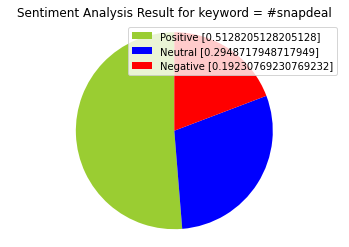

In [5]:
#Creating PieCart
labels = ['Positive ['+str(len(positive_list)/len(tweet_list))+']' , 'Neutral ['+str(len(neutral_list)/len(tweet_list))+']','Negative ['+str(len(negative_list)/len(tweet_list))+']']
sizes = [len(positive_list), len(neutral_list), len(negative_list)]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword = '+keyword+'' )
plt.axis('equal')
plt.show()

In [6]:
tweet_list

,0
0,"♻️""Snapdeal""♻️\n💃Credits 💃\n✍️Content writer: ..."
1,RT @snapdeal: Match your attitude with a villa...
2,@VKJAIN1961 @snapdeal And they want to compete...
3,@snapdeal I have been trying to get a refund f...
4,RT @snapdeal: Match your attitude with a villa...
...,...
73,flipkart saller support services\n\nplease if ...
74,RT @MAPATWARDHAN: Fintech growth is on the mon...
75,Fintech growth is on the money\n#India #Unicor...
76,"In Snap Deals 30% OFF section, you can have DS..."


### 4) Cleaning Tweets

In [7]:
tweet_list.drop_duplicates(inplace = True)

In [8]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
#rt = lambda x: re.sub('(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',x)
rt = lambda x: re.sub('(@[0–9]+)|([0-9 \t])|(\w+:\/\/\S+)',' ',x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"♻️""Snapdeal""♻️\n💃Credits 💃\n✍️Content writer: ...","♻️""snapdeal""♻️\n💃credits 💃\n✍️content writer: ..."
1,RT @snapdeal: Match your attitude with a villa...,match your attitude with a villain by partici...
2,@VKJAIN1961 @snapdeal And they want to compete...,@vkjain @snapdeal and they want to compete...
3,@snapdeal I have been trying to get a refund f...,@snapdeal i have been trying to get a refund f...
5,Snapdeal female employees to get extra six mon...,snapdeal female employees to get extra six mon...
7,Match your attitude with a villain by particip...,match your attitude with a villain by particip...
8,RT @snapdealdiaries: Do you know what does it ...,do you know what does it take to make a kid s...
9,#snapdeal \nNo pickup messages yet,#snapdeal \nno pickup messages yet
13,Do you know what does it take to make a kid sm...,do you know what does it take to make a kid sm...
14,@Snapdeal_Help 1 month time wasted of getting ...,@snapdeal_help month time wasted of getting ...


In [9]:
tw_list['text'].head(50)

0     ♻️"snapdeal"♻️\n💃credits 💃\n✍️content writer: ...
1      match your attitude with a villain by partici...
2     @vkjain     @snapdeal and they want to compete...
3     @snapdeal i have been trying to get a refund f...
5     snapdeal female employees to get extra six mon...
7     match your attitude with a villain by particip...
8      do you know what does it take to make a kid s...
9                    #snapdeal \nno pickup messages yet
13    do you know what does it take to make a kid sm...
14    @snapdeal_help   month time wasted of getting ...
15    #snapdeal\nbeen playing private game for the l...
16              #snapdeal \nplease pick up my frod item
17     snapdeal expresses a heartfelt tribute to the...
18     read more about snapdeal's “chic meets comfor...
21     watch what @riteishd asks an adorable little ...
23    since the beginning of the #pandemic last year...
24     mann mein modak fooootaaa? iss ganesh chaturt...
25     what occasion do you find the perfect dea

### 5) Analyse Sentiments

In [10]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"♻️""Snapdeal""♻️\n💃Credits 💃\n✍️Content writer: ...","♻️""snapdeal""♻️\n💃credits 💃\n✍️content writer: ...",0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
1,RT @snapdeal: Match your attitude with a villa...,match your attitude with a villain by partici...,0.650000,0.650000,negative,NaN,NaN,NaN,NaN
2,@VKJAIN1961 @snapdeal And they want to compete...,@vkjain @snapdeal and they want to compete...,0.114815,0.596296,positive,NaN,NaN,NaN,NaN
3,@snapdeal I have been trying to get a refund f...,@snapdeal i have been trying to get a refund f...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
5,Snapdeal female employees to get extra six mon...,snapdeal female employees to get extra six mon...,0.000000,0.133333,neutral,0.0,1.0,0.0,0.0
7,Match your attitude with a villain by particip...,match your attitude with a villain by particip...,0.650000,0.650000,positive,NaN,NaN,NaN,NaN
8,RT @snapdealdiaries: Do you know what does it ...,do you know what does it take to make a kid s...,0.150000,0.228571,positive,NaN,NaN,NaN,NaN
9,#snapdeal \nNo pickup messages yet,#snapdeal \nno pickup messages yet,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
13,Do you know what does it take to make a kid sm...,do you know what does it take to make a kid sm...,0.150000,0.228571,positive,NaN,NaN,NaN,NaN
14,@Snapdeal_Help 1 month time wasted of getting ...,@snapdeal_help month time wasted of getting ...,-0.225000,0.250000,negative,NaN,NaN,NaN,NaN


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [12]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,30,53.57
neutral,16,28.57
negative,10,17.86


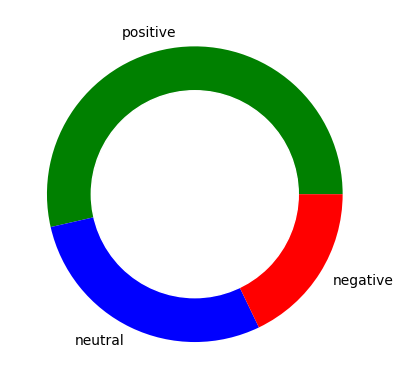

In [13]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,'sentiment')
names = pc.index
size=pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
import os 
os.chdir(r"C:\Users\Mahesh S Valanju\Desktop") 

In [15]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open('amazon2.jpg'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color='white',
    mask = mask,
    max_words=1000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path='wc.png'
    display(Image.open(path))

Word Cloud Saved Successfully


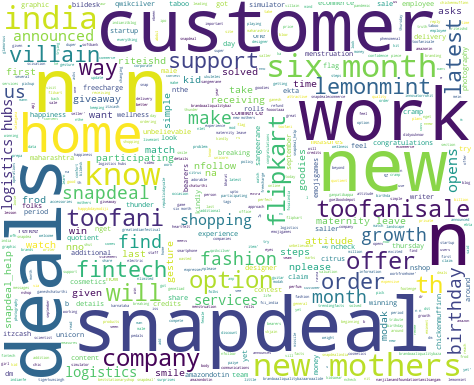

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list['text'].values)

Word Cloud Saved Successfully


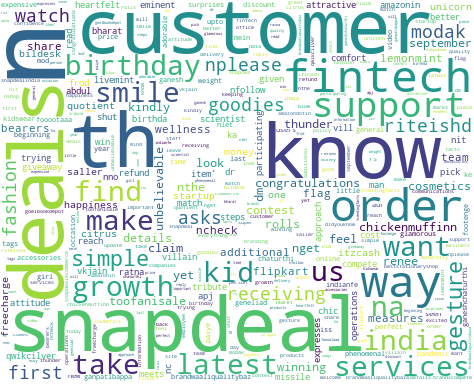

In [17]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive['text'].values)

Word Cloud Saved Successfully


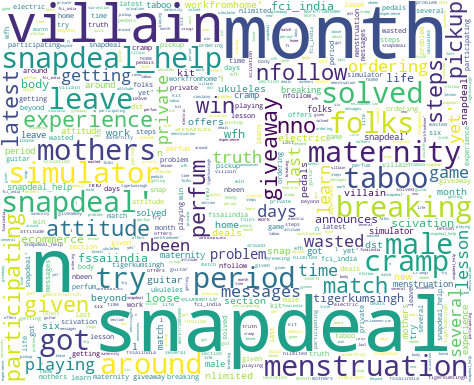

In [18]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative['text'].values)

In [19]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby('sentiment').text_len.mean()),2)

,text_len
sentiment,
negative,106.00
neutral,103.38
positive,114.37


In [20]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,16.80
neutral,14.00
positive,17.63


In [21]:
#Removing Punctuation
def remove_punct(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,"♻️""Snapdeal""♻️\n💃Credits 💃\n✍️Content writer: ...","♻️""snapdeal""♻️\n💃credits 💃\n✍️content writer: ...",0.000000,0.000000,neutral,0.0,1.0,0.0,0.0,118,10,♻️snapdeal♻️\n💃credits 💃\n✍️content writer bsa...,"[, snapdeal, credits, content, writer, bsangee...","[, snapdeal, credits, content, writer, bsangee...","[, snapdeal, credit, content, writer, bsangeer..."
1,RT @snapdeal: Match your attitude with a villa...,match your attitude with a villain by partici...,0.650000,0.650000,negative,NaN,NaN,NaN,NaN,127,21,match your attitude with a villain by partici...,"[, match, your, attitude, with, a, villain, by...","[, match, attitude, villain, participating, gi...","[, match, attitud, villain, particip, giveaway..."
2,@VKJAIN1961 @snapdeal And they want to compete...,@vkjain @snapdeal and they want to compete...,0.114815,0.596296,positive,NaN,NaN,NaN,NaN,118,18,vkjain snapdeal and they want to compete w...,"[vkjain, snapdeal, and, they, want, to, compet...","[vkjain, snapdeal, want, compete, amazonin, be...","[vkjain, snapdeal, want, compet, amazonin, bet..."
3,@snapdeal I have been trying to get a refund f...,@snapdeal i have been trying to get a refund f...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN,118,23,snapdeal i have been trying to get a refund fo...,"[snapdeal, i, have, been, trying, to, get, a, ...","[snapdeal, trying, get, refund, order, however...","[snapdeal, tri, get, refund, order, howev, way..."
5,Snapdeal female employees to get extra six mon...,snapdeal female employees to get extra six mon...,0.000000,0.133333,neutral,0.0,1.0,0.0,0.0,98,15,snapdeal female employees to get extra six mon...,"[snapdeal, female, employees, to, get, extra, ...","[snapdeal, female, employees, get, extra, six,...","[snapdeal, femal, employe, get, extra, six, mo..."


In [22]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

#1281 Number of reviews has 2966 words

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

56 Number of reviews has 321 words


,,abdul,accessori,add,addit,ador,amazon,amazondotin,amazonin,amp,...,welcom,well,wfh,win,work,workfromhom,would,writer,year,yet
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [23]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
snapdeal,48
new,10
month,8
work,7
deal,7
get,6
logist,6
mother,6
custom,6
six,5


In [24]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('work home', 5),
 ('new mothers', 5),
 ('option work', 4),
 ('offer new', 3),
 ('mothers option', 3),
 ('snapdeal opens', 3),
 ('opens new', 3),
 ('new logistics', 3),
 ('logistics hubs', 3),
 ('hubs snapdeal', 3),
 ('maternity leave', 3),
 ('match attitude', 2),
 ('attitude villain', 2),
 ('villain participating', 2),
 ('participating giveaway', 2),
 ('giveaway follow', 2),
 ('follow given', 2),
 ('given steps', 2),
 ('steps win', 2),
 ('win latest', 2)]

In [25]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('offer new mothers', 3),
 ('new mothers option', 3),
 ('mothers option work', 3),
 ('option work home', 3),
 ('snapdeal opens new', 3),
 ('opens new logistics', 3),
 ('new logistics hubs', 3),
 ('logistics hubs snapdeal', 3),
 ('match attitude villain', 2),
 ('attitude villain participating', 2),
 ('villain participating giveaway', 2),
 ('participating giveaway follow', 2),
 ('giveaway follow given', 2),
 ('follow given steps', 2),
 ('given steps win', 2),
 ('steps win latest', 2),
 ('months work home', 2),
 ('know does make', 2),
 ('does make kid', 2),
 ('make kid smile', 2)]